In [2]:
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re 
import string

import nltk 
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import TweetTokenizer

from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


plt.style.use("seaborn")

In [5]:
%matplotlib inline
sns.set_style('darkgrid')

In [6]:
# import data to dataframes
list_df = pd.read_csv('./listings.csv')

# EDA

In [7]:

list_clean = list_df.copy()
cols = ['thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'listing_url', 'host_url',
       'host_thumbnail_url', 'host_picture_url', 'country', 'country_code', 'neighbourhood',
       'smart_location', 'street', 'market', 'first_review', 'last_review', 'state', 'calendar_last_scraped',
       'calendar_updated', 'city', 'scrape_id', 'last_scraped', 'space', 'host_neighbourhood', 
        'neighborhood_overview', 'host_listings_count', 'zipcode', 'is_location_exact', 'host_location',
       'host_total_listings_count']
list_clean.drop(cols, axis=1, inplace=True)

In [8]:
# drop the colunms with more than half of the missing value
cols = list_clean.columns[list_clean.isnull().sum()/list_clean.shape[0] > 0.5]
list_clean.drop(cols, axis=1, inplace=True)

In [9]:
cols = ['host_response_rate', 'host_acceptance_rate', 'price', 'cleaning_fee', 'extra_people']
for col in cols:
    list_clean[col] = list_clean[col].str.extract(r'(\d+)')
    list_clean[col] = list_clean[col].astype('float128').astype('Int64')
list_clean[cols].dtypes

host_response_rate      Int64
host_acceptance_rate    Int64
price                   Int64
cleaning_fee            Int64
extra_people            Int64
dtype: object

In [10]:
df_num = list_clean.select_dtypes(include=['int', 'float'])

In [11]:
# fill na for the columns
int_fillmean = lambda x: x.fillna(round(x.mean()))
df_num = df_num.apply(int_fillmean, axis=0)
df_num = df_num.drop(['id', 'host_id', 'latitude', 'longitude'], axis=1).astype(float)

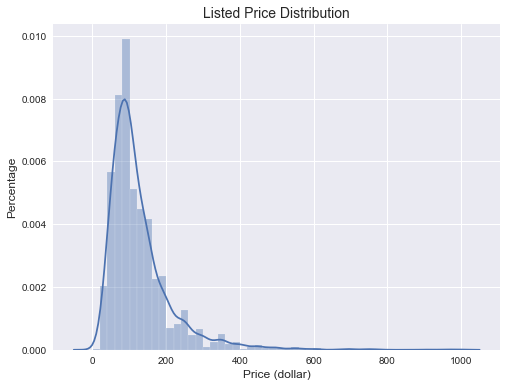

In [12]:
# visualizae the price
plt.figure(figsize=(8, 6))
sns.distplot(df_num['price'], bins=50, kde=True)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Price (dollar)', fontsize=12)
plt.title('Listed Price Distribution', fontsize=14);

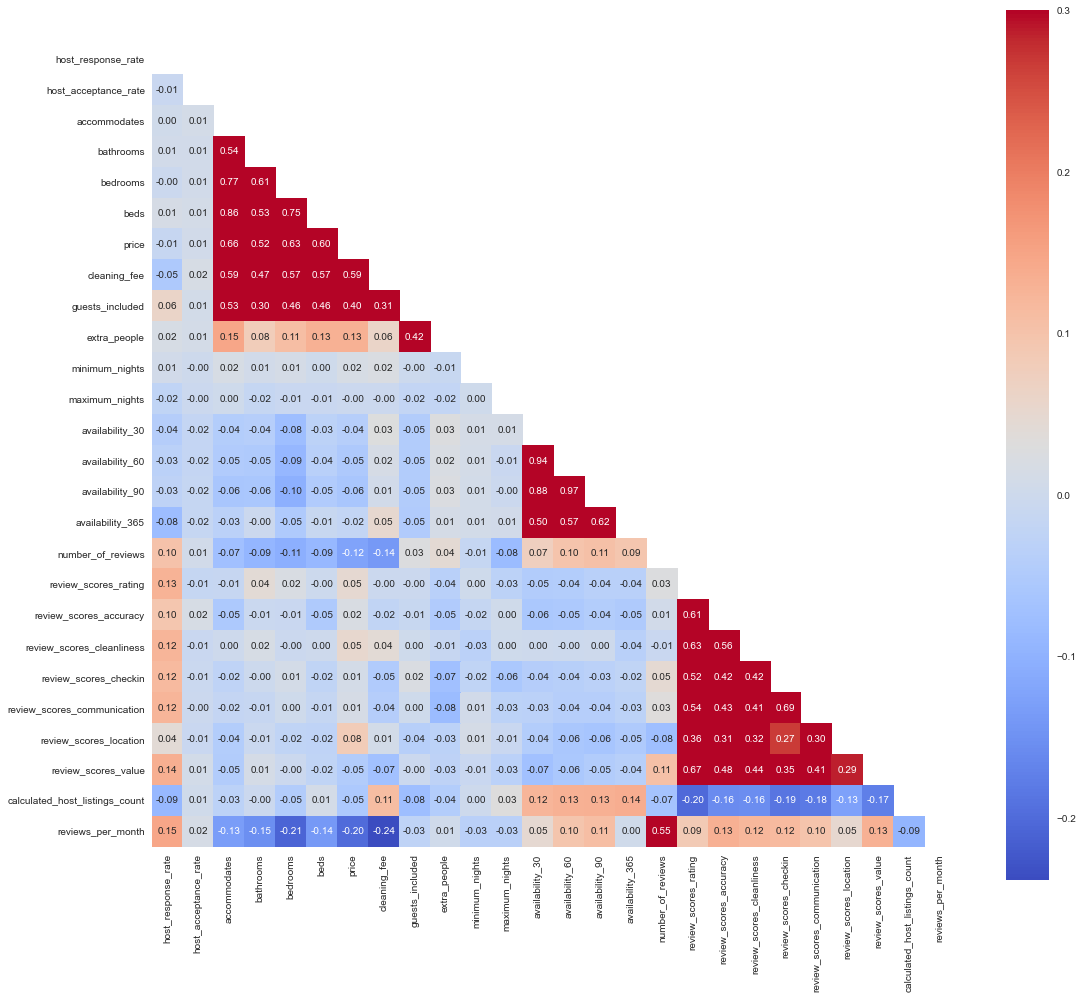

In [13]:
# visualize the correlation matrix
corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 16))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, fmt='.2f', cmap='coolwarm')

In [14]:
# categorical values
df_cat = list_clean.select_dtypes(include=['object'])
# we will drop few description lines for future analysis
df_cat = df_cat.drop(['name', 'summary', 'description', 'experiences_offered', 'host_about', 
                      'host_verifications', 'host_name'], axis=1)